In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covid-pneumonia-normal-chest-xray-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1105311%2F1857760%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241014%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241014T115541Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D241306e921da35a4873ce26e013bced5ba657fe2d47fcffa54106cfacc81da4d77fe3c311066bf534054b3fd658f05deb7fcae60115133797d0cf53e6878d20a3235cd34fbf35efa40616f596a36e69ebf3e82343f371d604c34743dc778e05a21a766d5360603b1c2d149ed8b66ca7fe41f574054c22e547017ed7468604a304356ce75f7f7e15178cd37256300710b3ed4ca96716cfa60d5b1a86554f5c356bbadfd45fd6f1f352efd9089e9b6aadccd0bf88cebfa0560a465e292d70622ba0afc1c2b33002bcf5bd8e2ec87738f15bba3949bb0db5aba20afe3c679bfa0770c0361d36a6cf4aa0ef46470a78a64a6234b61d407f8b3fac5ed35e06cbb434c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 290862263 bytes downloaded
Downloaded and uncompressed: covid-pneumonia-normal-chest-xray-images
Data source import complete.


Found 4183 images belonging to 3 classes.
Found 1045 images belonging to 3 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 92s 553ms/step - accuracy: 0.7214 - loss: 0.6911 - val_accuracy: 0.8794 - val_loss: 0.2945
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 114s 415ms/step - accuracy: 0.8794 - loss: 0.3355 - val_accuracy: 0.8775 - val_loss: 0.2835
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 82s 408ms/step - accuracy: 0.9107 - loss: 0.2461 - val_accuracy: 0.7904 - val_loss: 0.4968
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 56s 412ms/step - accuracy: 0.9080 - loss: 0.2665 - val_accuracy: 0.8842 - val_loss: 0.2712
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 56s 409ms/step - accuracy: 0.9129 - loss: 0.2575 - val_accuracy: 0.8191 - val_loss: 0.4179
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 58s 415ms/step - accuracy: 0.9117 - loss: 0.2425 - val_accuracy: 0.9014 - val_loss: 0.2454
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 81s 416ms/step - accuracy: 0.9117 - loss: 0.2329 - val_accuracy: 0.9263 - val_loss: 0.2096
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 56s 403ms/step - accuracy: 0.9130 - loss: 0.2181 - va

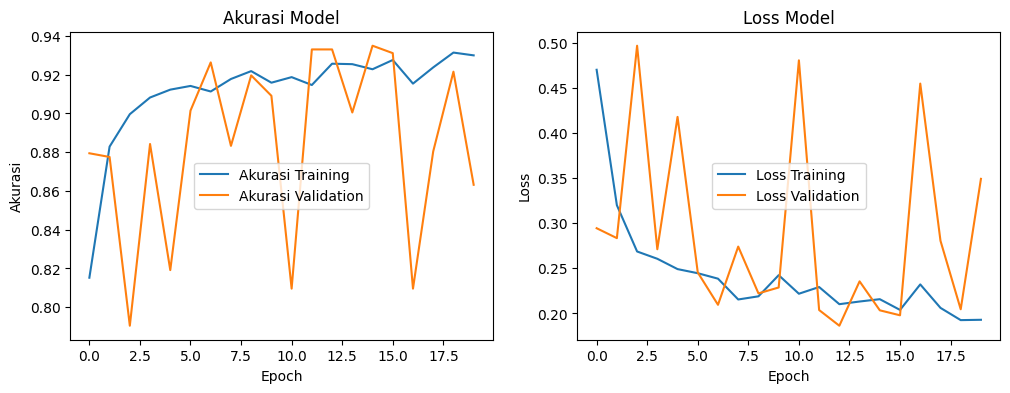

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9390 - loss: 0.1678
Loss pada data validasi: 0.1864
Akurasi pada data validasi: 0.9330


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Path dataset
dataset_path = '/kaggle/input/covid-pneumonia-normal-chest-xray-images/'

# Parameters
img_size = (224, 224)  # Ukuran input untuk InceptionV3
batch_size = 32
epochs = 20

# Data Augmentation untuk training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi pixel [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Data Augmentation untuk validation set
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 80% untuk training
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 20% untuk validation
)

# Load pretrained InceptionV3 tanpa fully connected layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=img_size + (3,))

# Freeze base model
base_model.trainable = False

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pooling layer untuk meratakan fitur
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(3, activation='softmax')  # Output layer (3 classes: COVID, PNEUMONIA, NORMAL)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: early stopping dan model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('inceptionv3_best_model.keras', save_best_only=True, monitor='val_loss')

# Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)

# Save final model as .keras file
model.save('inceptionv3_final_model.keras')

print("Model training selesai dan disimpan sebagai inceptionv3_final_model.keras")

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))

# Plot akurasi training dan validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss training dan validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluasi model pada data validasi
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Loss pada data validasi: {val_loss:.4f}")
print(f"Akurasi pada data validasi: {val_accuracy:.4f}")


In [ ]:
!zip -r model_inceptionv3.zip inceptionv3_best_model.keras


  adding: inceptionv3_best_model.keras (deflated 9%)


In [ ]:
from google.colab import files
files.download('inceptionv3_best_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('inceptionv3_best_model.keras')